<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/mini_project_Linear_regression_bigcity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Collect and load data

In [2]:
df= pd.read_csv('/content/bigcity.csv')

In [3]:
print(df.shape)

(49, 3)


In [4]:
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [6]:
df.drop({'Unnamed: 0'}, axis=1, inplace=True)
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [7]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


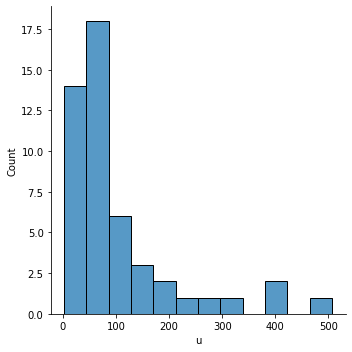

In [16]:
sns.displot(df['u'])
plt.show()

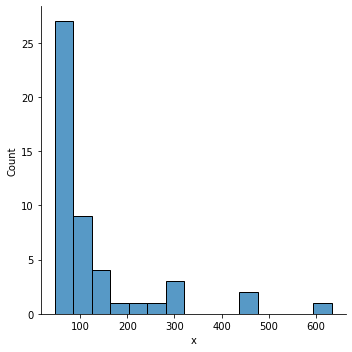

In [15]:
sns.displot(df['x'])
plt.show()

# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


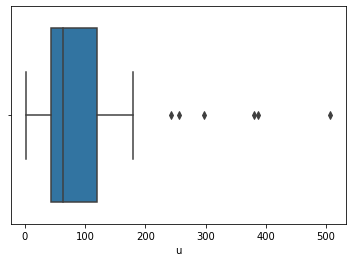

In [12]:
sns.boxplot(df['u'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


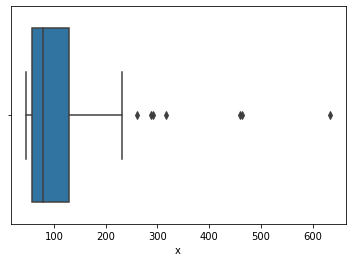

In [14]:
sns.boxplot(df['x'])
plt.show()

In [ ]:
# both of the features are right skewed

In [19]:
# Variance:

print(np.var(df['u']))
print(np.var(df['x']))

# standard deviation

print(np.std(df['u']))
print(np.std(df['x']))

# mean
print(np.mean(df['u']))
print(np.mean(df['x']))

#median
print(np.median(df['u']))
print(np.median(df['x']))

10677.959183673465
14849.468554768846
103.33421110006823
121.85839550383406
103.14285714285714
127.79591836734694
64.0
79.0


14641

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


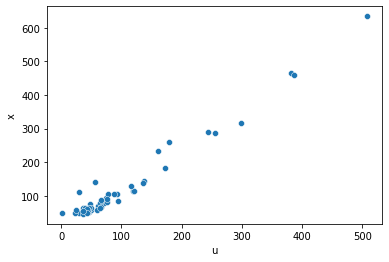

In [20]:
sns.scatterplot(df['u'], df['x'])
plt.show()

## We can see a linear relationship between the two variables- as one increases, the second also tend to increase

In [63]:
rt

0      138
1       93
2       61
3      179
4       48
      ... 
45      61
46      50
47     232
48      54
col      u
Length: 99, dtype: object

In [57]:
rt = pd.concat([df['u'], df['x']])

In [61]:
rt['col'] = 'u'

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [64]:
y= df['x']
x= df['u']

In [65]:
df.shape

(49, 2)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [66]:
df.isna().sum()

u    0
x    0
dtype: int64

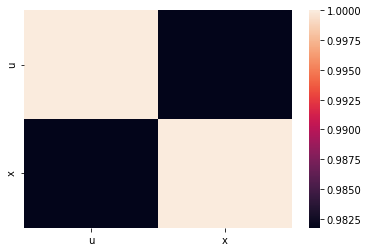

In [67]:
sns.heatmap(df.corr())

In [68]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

In [ ]:
# umm ok

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [69]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(x, y, train_size=0.8)

In [70]:
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(39,)
(10,)
(39,)
(10,)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [71]:
from sklearn.linear_model import LinearRegression

er= LinearRegression()

In [82]:
er.fit(np.reshape(xtr.values, (-1,1)),ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# Have a look at R sq to give an idea of the fit 
print('R sq: ',er.score(np.reshape(xts.values, (-1,1)),yts))

R sq:  0.9727072548381338


In [85]:
# This the coefficient for the single feature
print("Coefficient for X ", er.coef_)

# Get the standard error
print ("Standard Error: ",stats.sem(xtr))

ttest = er.coef_/stats.sem(xtr)
print ("The t-statistic:",ttest)

# but we need the p-value to help determine the probablity that we have a correct t-statistic
print ("Two tailed p-values: ")
stats.pearsonr(xtr, ytr)

Coefficient for X  [1.13095144]
Standard Error:  14.435088415737471
The t-statistic: [0.07834739]
Two tailed p-values: 


(0.9770346050852661, 1.908088653050491e-26)

In [91]:
er.intercept_

8.183549561123272

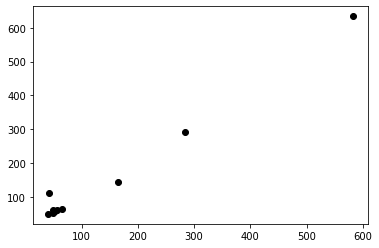

In [86]:
y_predicted = er.predict(np.reshape(xts.values, (-1,1)))
plt.scatter(y_predicted, yts,  color='black')
plt.show()

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [92]:
te= []

for i in range(11):
  te.append(er.intercept_ + er.coef_*i)

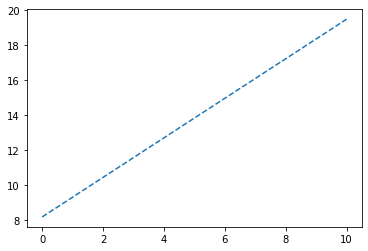

In [101]:
plt.plot(te, '--')

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

print(r2_score(np.reshape(xtr.values, (-1,1)),ytr))
print(r2_score(np.reshape(xts.values, (-1,1)),yts))

# RMSE

print(np.sqrt(mean_squared_error(np.reshape(xtr.values, (-1,1)),ytr)))
print(np.sqrt(mean_squared_error(np.reshape(xts.values, (-1,1)),yts)))

0.8648152293624297
0.8711869478222455
32.71712481882013
52.32590180780452


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [87]:
print(er.score(np.reshape(xtr.values, (-1,1)),ytr))

print(er.score(np.reshape(xts.values, (-1,1)),yts))

0.9545966195341214
0.9727072548381338
